In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df = pd.read_csv("iperf.csv", index_col = [1])
df = pd.read_csv("../Saidas/Teste2/teste2.csv")
#Remove colunas desnecessarias
del df['Timestamp']
del df['?']
del df['ForaOrdem']
del df['Tempo']
dfServer = df[df.IpOri != '10.1.0.2']
dfCliente = df[df.IpOri != '10.1.0.1']
df = dfServer
df = df.reset_index(drop=True)
df

,IpOri,PortaOri,IpDest,PortaDest,BitsEnv,Banda,Jitter,PctPerdido,PctEnv,%Perda
0,10.1.0.1,5061,10.1.0.2,5561,639450,242815,0.130,0.0,435.0,0.000
1,10.1.0.1,5287,10.1.0.2,5787,4146870,1070101,0.089,1.0,2822.0,0.035
2,10.1.0.1,5032,10.1.0.2,5532,2434320,751945,0.094,0.0,1656.0,0.000
3,10.1.0.1,5092,10.1.0.2,5592,5206740,1015827,0.081,1.0,3543.0,0.028
4,10.1.0.1,5254,10.1.0.2,5754,9503550,1810442,0.102,2.0,6467.0,0.031
5,10.1.0.1,5027,10.1.0.2,5527,3846990,699944,0.601,1.0,2618.0,0.038
6,10.1.0.1,5091,10.1.0.2,5591,25203150,4359891,15.938,263.0,17408.0,1.511
7,10.1.0.1,5277,10.1.0.2,5777,2078580,405720,0.101,1.0,1415.0,0.071
8,10.1.0.1,5228,10.1.0.2,5728,6304830,1366414,0.218,1.0,4290.0,0.023
9,10.1.0.1,5207,10.1.0.2,5707,4651080,792326,0.420,1.0,3165.0,0.032


In [3]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

/home/pedro/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/pedro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/pedro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


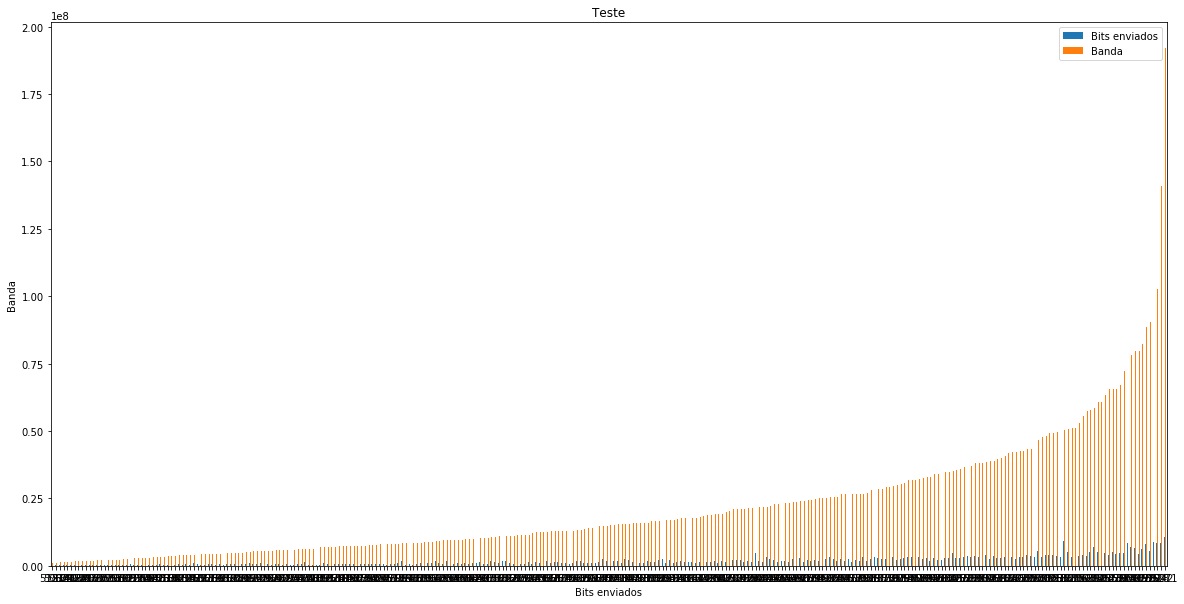

In [4]:
#Removendo trafegos pequenos
df = df.query("BitsEnv > 1000000")

gpb = df.groupby (['PortaOri'])
media = gpb.mean()
err = gpb.aggregate(confinterval)
err = err.filter(items=['Banda', 'BitsEnv'])
media = media.filter(items=['Banda', 'BitsEnv'])
#display (media)
#display (err)

media.sort_values(by=["BitsEnv"]).plot (kind='bar', yerr=err, title="Teste", rot=360, figsize=(20,10))
plt.xlabel('Bits enviados')
plt.ylabel('Banda')
plt.gca().legend(('Bits enviados','Banda'))
#plt.savefig('grafico_teste'.pdf')